In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree, ensemble
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold
from collections import defaultdict
import pprint

In [10]:
# Assignment Constants
RANDOM_STATE = 10
FIGSIZE = (12,8)
#### Use the following line before plt.plot(....) to increase the plot size ####
# plt.figure(figsize=FIGSIZE)

## Question 1
Use the breast cancer data set from Homework 0 to create a training set. Recall that the
label is 0 if the patient’s data indicates a malignant cancer and 1 otherwise. Compute the
base rate of malignant cancer occurrence over the entire data set. In other words, what would
be your best guess for the probability of malignant cancer of a single example using only the
labels in the training set? This question is very simple, so try not to overthink it.

In [11]:
# Import dataset
import pandas as pd
cancer = load_breast_cancer()

# Load the data in a dataframe
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

# Add 'target' key for convenience
df['target'] = cancer.target # 0 = malignant, 1 = benign

# Calculate base rate of malignant cases = malignant cases(q)/total cases(total)
target = df['target']
q = np.where(target == 0)[0]
total = len(target)
base_rate_malignant = len(q)/total
print(f"Base rate of malignant cases: {base_rate_malignant:.4f}")

Base rate of malignant cases: 0.3726


**Answer 1:**
Base rate of malignant cases = 0.3726

## 2
The goal is to build a decision tree that, based on the other features in the set, predicts
whether or not a patient has malignant cancer. So this is a classification problem. Using
`tree.DecisionTreeClassifier` and other functions in the scikit-learn library, one can build
a decision tree and calculate both its training accuracy when fitted to the entire data set as
well as its accuracy using 10-fold cross validation (which gives a better idea of true accuracy).
In this question you will need to complete two sub-components:
### (a)
(a) Make a plot visualizing the performance of a `tree.DecisionTreeClassifier` as you
search for an optimal `max_depth` parameter. Vary the depth of your decision tree using
max depth = 1,2,. . . ,10 and record the results from the following evaluation procedures
for each setting:
* The accuracy when training and testing on the full dataset.
* 10-fold cross-validated accuracy.

Plot the results of both evaluation procedures on the same plot with evaluation scores on
the y-axis and max depth values on the x-axis. Use 10 as your random seed/state for the
decision tree and the cross-validation. Use a legend to label both evaluation procedures.


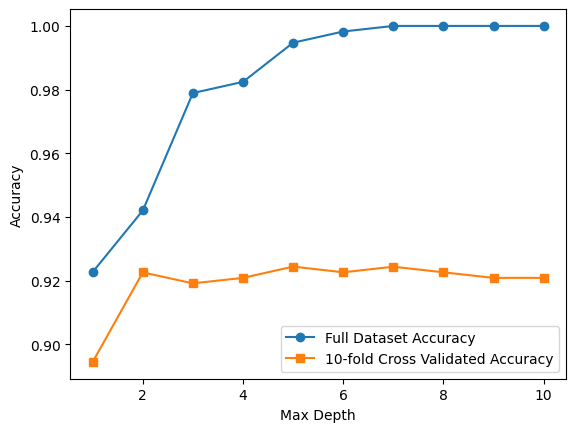

In [12]:
# Array x of shape (n_samples, n_features) holding the training samples
# Array y of integer values, shape (n_samples), holding the class labels for the training samples
X = cancer.data
y = cancer.target

# Initialize arrays to store results for a full dataset accuracy & 10-fold cross validated accuracy
full_dataset_accuracies = []
cross_validated_accuracies = []

# K-Fold cross-validator
k_fold = KFold(n_splits = 10,shuffle=True, random_state=RANDOM_STATE)

# Loop through max depth = 1,2,...,10
for max_depth in range (1,11):
  # Create decision tree classifier to perform multi-class classification on a dataset
  clf = tree.DecisionTreeClassifier(max_depth=max_depth, random_state = RANDOM_STATE)
  # Fit the data; train on the full dataset
  clf = clf.fit(X,y)

  # Calculate accuracy (when training and testing ont the full dataset).
  # clf.score: Return the mean accuracy on the given test data and labels.
  full_dataset_accuracy = clf.score(X,y)
  # Calculate 10-fold (cv=10) cross-validated accuracy
  # cross_val_score returns an array of scores, with each score corresponding to 1-fold
  # By using np.mean, we calculate the avg accuracy across all folds, giving a single scalar value representing the overall cross-validated accuracy
  cross_validated_accuracy = np.mean(cross_val_score(clf, X, y, cv=k_fold))
  # Append accuracy values
  full_dataset_accuracies.append(full_dataset_accuracy)
  cross_validated_accuracies.append(cross_validated_accuracy)

# Plot
plt.plot(range(1,11), full_dataset_accuracies, label = "Full Dataset Accuracy", marker="o")
plt.plot(range(1,11), cross_validated_accuracies, label = "10-fold Cross Validated Accuracy", marker="s")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()

### (b)
Answer the questions below based on the results of 2a. Write your answers in the
corresponding field in the markdown cell that is present in the HW1 template notebook.
Do this by double clicking the markdown cell and writing your answer directly in the
cell. Pressing enter will re-render the markdown.

#### (i.)
What setting of `max_depth` gave the best accuracy w.r.t. the **full-dataset** accuracy?
If more than one setting equaled the best accuracy, list each of the best settings.

**Student answer here:** max depth = 7, 8, 9, 10

#### (ii.)
What setting of `max_depth`  gave the best accuracy w.r.t. the **cross-
validated** accuracy? If more than one setting equaled the best accuracy, list each of the best settings.

**Student answer here:** max depth = 5



In [13]:
# Create table
accuracy_table = pd.DataFrame({'Max Depth': range(1,11), "Full Dataset Accuracy": full_dataset_accuracies, "10-fold Cross Validated Accuracy": cross_validated_accuracies})
print(accuracy_table)

   Max Depth  Full Dataset Accuracy  10-fold Cross Validated Accuracy
0          1               0.922671                          0.894424
1          2               0.942004                          0.922556
2          3               0.978910                          0.919110
3          4               0.982425                          0.920833
4          5               0.994728                          0.924373
5          6               0.998243                          0.922588
6          7               1.000000                          0.924342
7          8               1.000000                          0.922588
8          9               1.000000                          0.920833
9         10               1.000000                          0.920833


## 3\.
This question explores random forest classifiers by using scikit-learn’s `ensemble.RandomForestClassifier`.
You will make two plots and answer questions about them.

### (a)
For the first plot, use a `ensemble.RandomForestClassifier` and the best depth you
found 2(b)ii as `max_depth`. We will now find the optimal setting of a second parameter,
n estimators. Vary the number of trees in the forest via the parameter `n_estimators`
and plot its 10-fold cross-validated accuracy (use `n_estimators` = 1, 2, . . . , 20). Again,
use 10 as your random seed for your classifier and cross-validation.

    Max Depth  Forest Classifier Accuracy
0           1                    0.917293
1           2                    0.929668
2           3                    0.945426
3           4                    0.948935
4           5                    0.945426
5           6                    0.950689
6           7                    0.947180
7           8                    0.941917
8           9                    0.948935
9          10                    0.945426
10         11                    0.940163
11         12                    0.948935
12         13                    0.950689
13         14                    0.948904
14         15                    0.947180
15         16                    0.954198
16         17                    0.950689
17         18                    0.950689
18         19                    0.952444
19         20                    0.950689


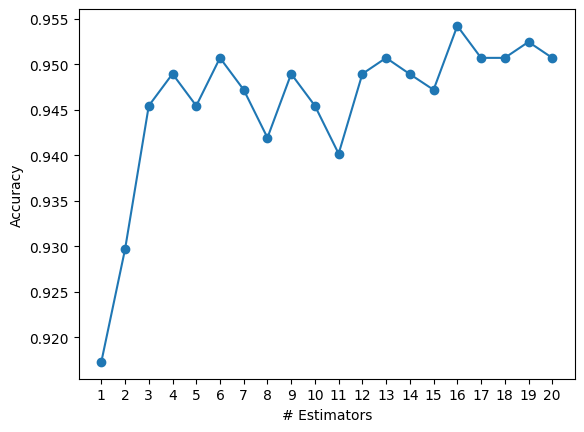

In [14]:
def accuracy(max_range, n_estimators = None, max_depth = None):
  # Initialize arrays to store results for a forest classifier accuracy
  forest_classifier_accuracies = []

  for i in range (1,max_range):
    # Loop through n estimators = 1,2,...,20
    if n_estimators is None:
      clf = ensemble.RandomForestClassifier(n_estimators = i, max_depth = max_depth, random_state = RANDOM_STATE)
    # Loop through max_depth = 1,2,...,10
    else:
      clf = ensemble.RandomForestClassifier(n_estimators = n_estimators, max_depth = i, random_state = RANDOM_STATE)
    # Calculate 10-fold cross-validated accuracy. No need for clf.fit b/c already internally calls 'fit' to train the model & 'predict' for the validation
    forest_classifier_accuracy = np.mean(cross_val_score(clf, X, y, cv=k_fold))
    # Append accuracy values
    forest_classifier_accuracies.append(forest_classifier_accuracy)

  # Plot
  plt.plot(range(1,max_range), forest_classifier_accuracies, label = "Forest Classifier Accuracy", marker="o")
  plt.xticks(np.arange(1, max_range, 1.0))
  if n_estimators is None:
    plt.xlabel("# Estimators")
  else:
    plt.xlabel("Max Depth")
  plt.ylabel("Accuracy")

  # Create table
  accuracy_table = pd.DataFrame({'Max Depth': range(1,max_range), "Forest Classifier Accuracy": forest_classifier_accuracies})
  print(accuracy_table)

# Defined max_depth, find the optimal n_estimators
accuracy(max_range = 21, max_depth=5)

### (b)
Do you see an improvement using random forests versus using a single tree? (Note: use
the `n_estimators`=1 result as the result for a single tree.)

**Student answer here:** Yes; the accuracy for the random forest is >= 0.92 overall (except when n estimators = 1), whereas the accuracy for the single tree is 0.93.

### (c)
What setting of `n_estimators` gave the best accuracy w.r.t. the cross-validated accuracy?

**Student answer here:** n_estimators = 16

### (d)
For the second plot, again use a `ensemble.RandomForestClassifier`, but this time
you will fix the `n_estimators` parameter and again attempt to find the optimal setting
of a `max_depth`. Use your answer to 3c as the setting for `n_estimators` and follow the
procedure from 2a to find the best setting for max depth. This time, only plot the results
from cross-validation and not the full set, but the plot should be the same structure
as in 2a otherwise (use `max_depth` = 1,2,. . . ,10). Again, use 10 as your random seed.

   Max Depth  Forest Classifier Accuracy
0          1                    0.917262
1          2                    0.943672
2          3                    0.947149
3          4                    0.947118
4          5                    0.954198
5          6                    0.957707
6          7                    0.952444
7          8                    0.952444
8          9                    0.954198
9         10                    0.954198


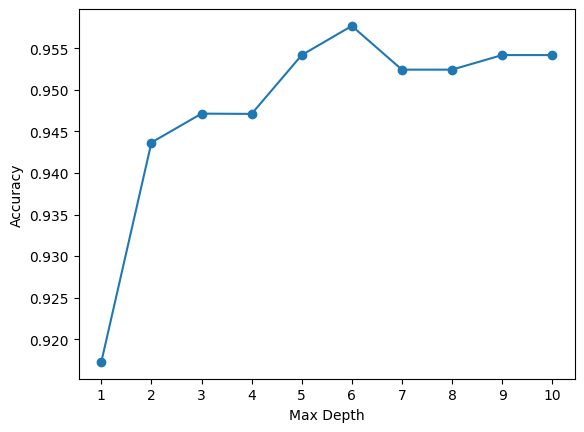

In [17]:
# Defined n_estimators, find the optimal max_depth
accuracy(max_range = 11, n_estimators= 16)

**Answer 3d:** Optimal **max_depth = 6** assuming n_estimators = 16.

### (e)
In the plot in 3d, is the optimal setting of `max_depth` the same as in 2(b)ii? If not, what
is the new optimal setting of `max_depth`?

**Student answer here:** No; the optimal **max_depth = 6** assuming n_estimators = 16.

## 4\.
For this last question, we will explore the dependability of our estimates.
### (a)
Make a plot using the following procedure:
#### i.
Using random state values from 0, 1, · · · , 99 calculate the 10-fold cross-validation
accuracy of different `tree.DecisionTreeClassifiers` with max depth settings from
1, 2, · · · , 10.
As before, you should use the same random state value for your classifier and cross-validation.
#### ii.
Then record the best max depth settings for each random state. Be sure to check whether multiple settings
achieve the best accuracy.


Plot the counts for the best max depth settings as a bar chart with the max depth settings on the x-axis and the 'best parameter counts' on the y-axis (number of times that parameter was selected as the best max depth setting).

*Note*: this calculation might take some time. For debugging, try a smaller range of
random states.

Best max depth counts: {2: 36, 5: 31, 6: 22, 9: 3, 10: 3, 7: 9, 4: 1, 8: 1}


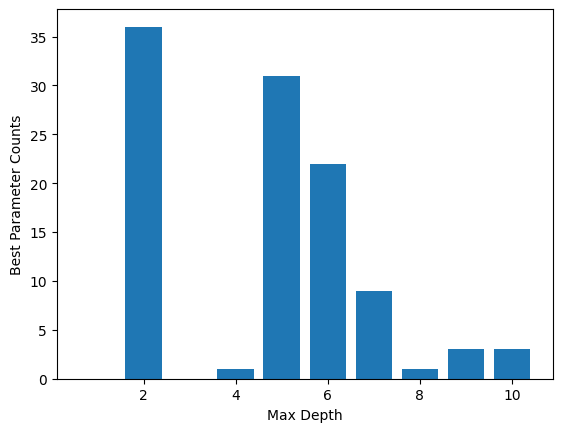

In [16]:
from typing import Counter
# Initialize arrays to store results for a forest classifier accuracy
maxdepth_randomstate_accuracies = []

# Loop through random_state = 0,2,...99
for random_state in range (100):
  # Initialize array to store accuracies for the current random state
  randomstate_accuracies = []
  # Loop through max_depth = 1,2,...,10
  for max_depth in range (1,11):
    clf = tree.DecisionTreeClassifier(max_depth = max_depth, random_state = random_state)
    # Calculate 10-fold cross-validated accuracy. No need for clf.fit b/c already internally calls 'fit' to train the model & 'predict' for the validation
    maxdepth_randomstate_accuracy = np.mean(cross_val_score(clf, X, y, cv=k_fold))
    # Append accuracy values to corresponding max_depth
    randomstate_accuracies.append((max_depth, maxdepth_randomstate_accuracy))

  # Find the largest accuracy. acc[1] refers to the accuracy value (2nd element of tuple)
  max_accuracy = max(acc[1] for acc in randomstate_accuracies)
  # Find the best max_depth values that achieve the max accuracy
  best_depths = []
  for max_depth, acc in randomstate_accuracies:
    if max_accuracy == acc:
        best_depths.append(max_depth)
  # Extend the list with the best max_depth(s) for the current random state
  maxdepth_randomstate_accuracies.extend(best_depths)

# Counts how many times max_depth was the best over the 100 random states
maxdepth_count = Counter(maxdepth_randomstate_accuracies)

# Plot
x_plot = range(1,11) #max_depth values
y_plot = [] #counts for each depth
for max_depth in x_plot:
  y_plot.append(maxdepth_count[max_depth])
plt.bar(x_plot, y_plot)
plt.xlabel("Max Depth")
plt.ylabel("Best Parameter Counts")

print("Best max depth counts:",dict(maxdepth_count))

### (b)
What are the top two most frequent parameter settings?

**Student answer here:** max_depth = 2, 5